In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Loading Dataset

In [2]:
df = pd.read_csv('Credit.csv')

# EDA

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [5]:
df.shape

(400, 11)

In [6]:
df1 = df.drop(['Ethnicity'], axis = 1)
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


In [7]:
df1.shape

(400, 10)

In [8]:
df1['Gender']=df1['Gender'].map({'Female':0,' Male':1})
df1['Student']=df1['Student'].map({'No':0,'Yes':1})
df1['Married']=df1['Married'].map({'No':0,'Yes':1})

In [9]:
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,1,0,1,333
1,106.025,6645,483,3,82,15,0,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,580
3,148.924,9504,681,3,36,11,0,0,0,964
4,55.882,4897,357,2,68,16,1,0,1,331


In [31]:
X = df1.drop(['Balance'], axis = 1)

# Performing Standard Scaler on Independent Variables 

In [32]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

C:\Users\vivekgravindranath\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vivekgravindranath\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
df2 = pd.DataFrame(X_sc,columns=X.columns)
df2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,1.035635,-0.333333,0.795395
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,-0.965592,3.000000,0.795395
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,1.035635,-0.333333,-1.257237
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,-0.965592,-0.333333,-1.257237
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,1.035635,-0.333333,0.795395


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null int64
Student      400 non-null int64
Married      400 non-null int64
Balance      400 non-null int64
dtypes: float64(1), int64(9)
memory usage: 31.3 KB


In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Gender,400.0,0.482500,0.500319,0.000,0.00000,0.0000,1.00000,1.000
Student,400.0,0.100000,0.300376,0.000,0.00000,0.0000,0.00000,1.000
Married,400.0,0.612500,0.487790,0.000,0.00000,1.0000,1.00000,1.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


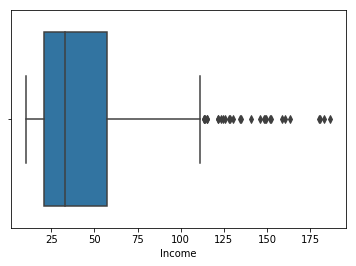

In [16]:
sns.boxplot(x = 'Income', data = df1)

### Outliers are present in the Income feature

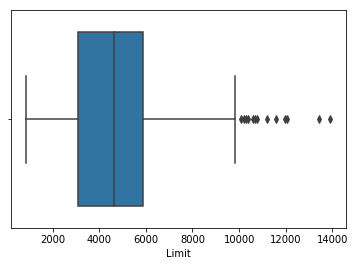

In [17]:
sns.boxplot(x = 'Limit', data = df1)

### We can see outliers in Limit feature

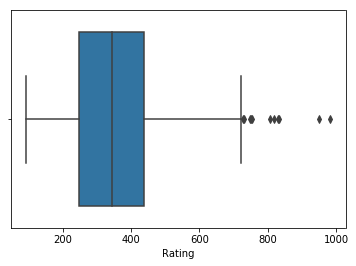

In [18]:
sns.boxplot(x = 'Rating', data = df1)

### Presence of outliers in Rating

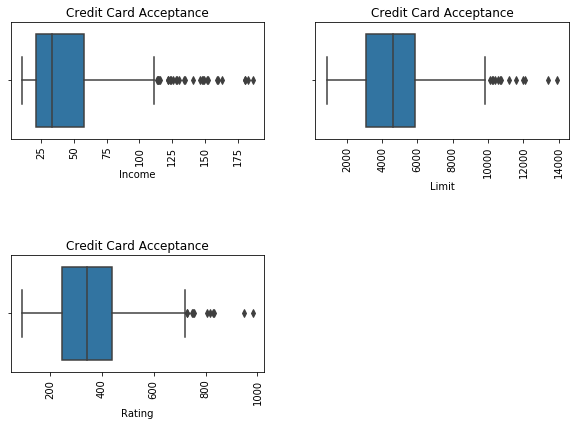

In [50]:
features=['Income', 'Limit', 'Rating']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(x=j,data = df1)
    plt.xticks(rotation=90)
    plt.title('Credit Card Acceptance')
    
plt.show()

In [10]:
df1['Gender'].value_counts()

0    207
1    193
Name: Gender, dtype: int64

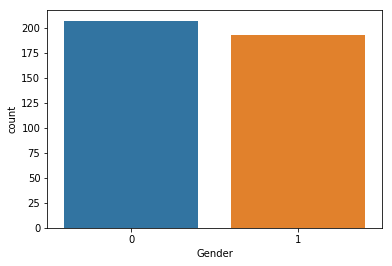

In [25]:
sns.countplot(x='Gender',data=df1)

In [11]:
df1['Student'].value_counts()

0    360
1     40
Name: Student, dtype: int64

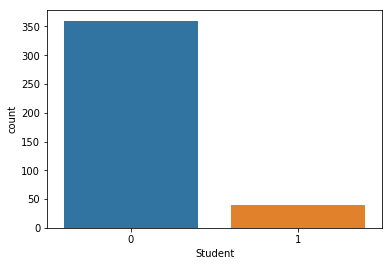

In [26]:
sns.countplot(x = 'Student', data = df1)

In [12]:
df1['Married'].value_counts()

1    245
0    155
Name: Married, dtype: int64

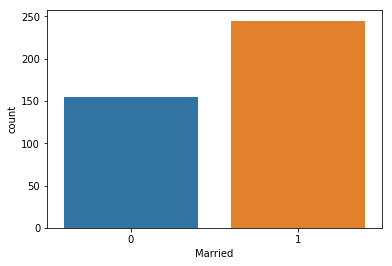

In [27]:
sns.countplot(x = 'Married', data = df1)

In [13]:
df1['Cards'].value_counts()

2    115
3    111
4     72
1     51
5     34
6     11
7      4
9      1
8      1
Name: Cards, dtype: int64

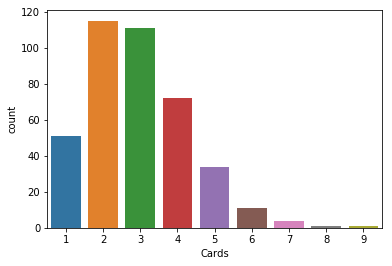

In [28]:
sns.countplot(x = 'Cards', data = df1)

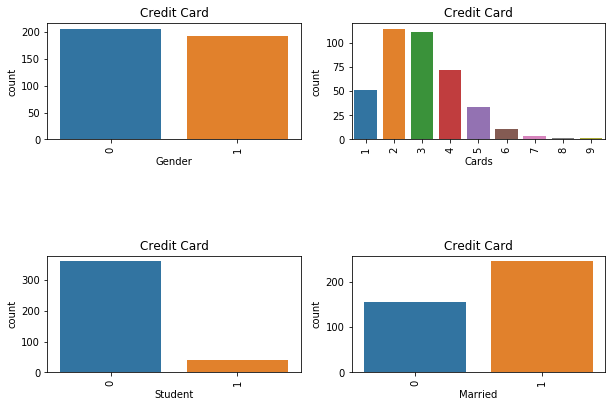

In [45]:
features=['Gender', 'Cards', 'Student', 'Married']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df1)
    plt.xticks(rotation=90)
    plt.title("Credit Card")
    
plt.show()

In [19]:
corrmat = df1.corr()

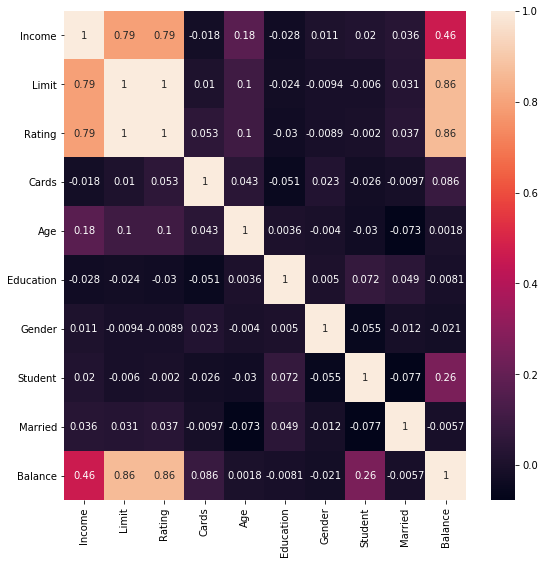

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(corrmat,annot = True)

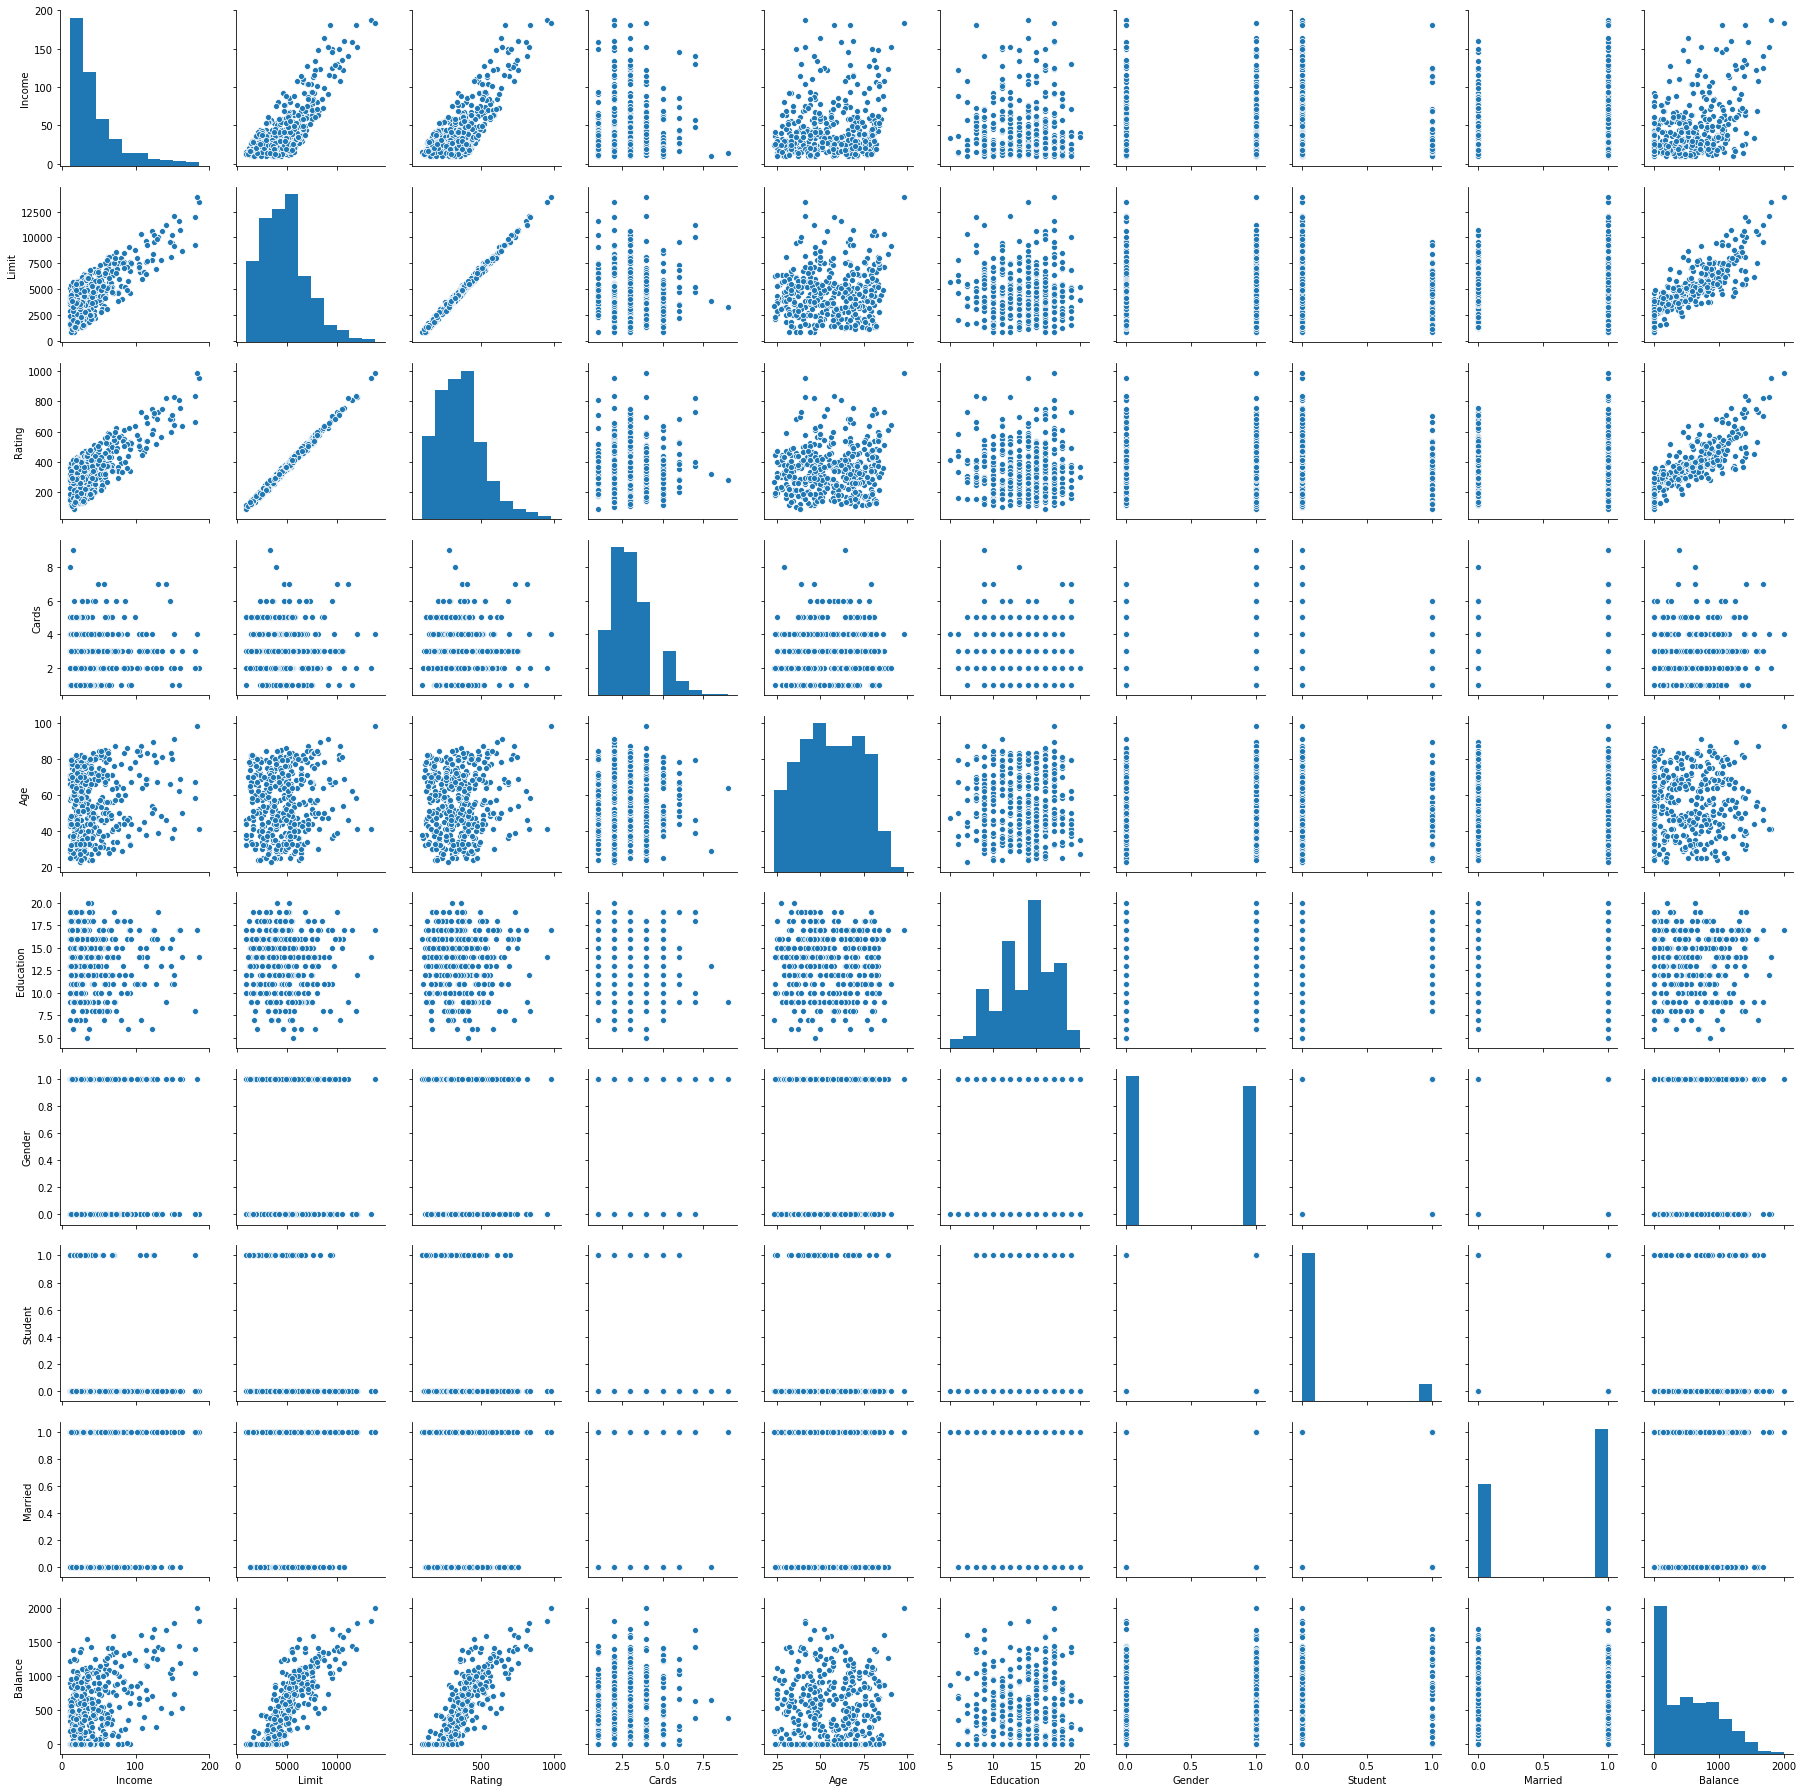

In [21]:
sns.pairplot(df1)

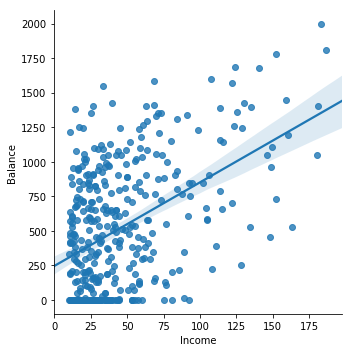

In [40]:
sns.lmplot('Income','Balance', data = df1)

### We find correlation between Balance and Income

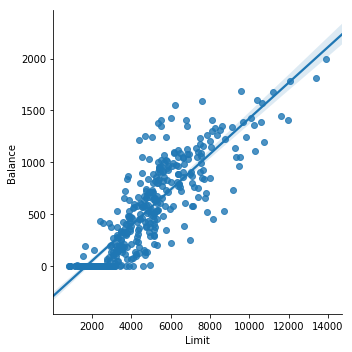

In [41]:
sns.lmplot('Limit','Balance', data = df1)

### We find strong positive correlation between Limit and Balance 

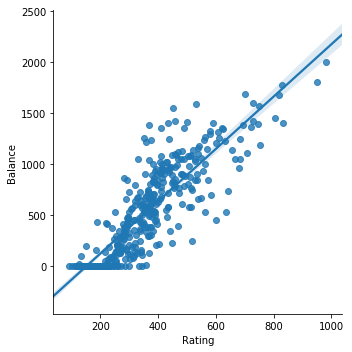

In [42]:
sns.lmplot('Rating','Balance', data = df1)

### We find strong positive correlation between Rating and Balance

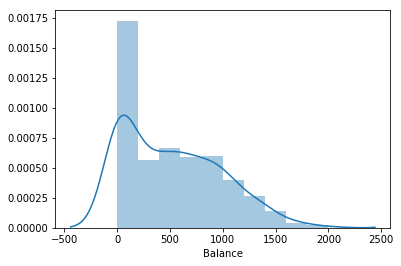

In [53]:
sns.distplot(df1['Balance'])

In [63]:
df1["Balance"].groupby(df1["Gender"]).sum()

Gender
0    109614
1     98392
Name: Balance, dtype: int64

In [55]:
df1["Balance"].groupby(df1["Married"]).sum()

Married
0     81110
1    126896
Name: Balance, dtype: int64

In [56]:
df1["Balance"].groupby(df1["Student"]).sum()

Student
0    172933
1     35073
Name: Balance, dtype: int64

In [57]:
df1["Balance"].groupby(df1["Cards"]).sum()

Cards
1    27088
2    54391
3    54619
4    41502
5    17782
6     7489
7     4115
8      638
9      382
Name: Balance, dtype: int64

# Model Building

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#  1. Basic OLS Model

In [128]:
basic_ols_model = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married', data = df1).fit()
print(basic_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     918.2
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          2.49e-256
Time:                        15:48:17   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -478.8104     34.343    -13.942      0.0

# Model Performance - 
R2 = 0.955

Adj. R2 = 0.954

We get R2 = 0.955 and Adj. R2 = 0.954 for the OLS model. The features Education, Gender and Married are having P-value greater than 0.05, therefore those are insignificant features, but VIF is less than 10 for Gender and Married, while VIF is greater than 10 for Education. So, in this dataset the insiginificant variable is 'Education'.

# Variance Inflation Factor (VIF)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [127]:
vif.round(1)

,VIF Factor,features
0,7.2,Income
1,1074.0,Limit
2,1268.1,Rating
3,8.2,Cards
4,9.6,Age
5,11.6,Education
6,1.9,Gender
7,1.1,Student
8,2.6,Married


# Train Test Split

In [66]:
X_sc

array([[-0.86158299, -0.48999879, -0.46553881, ...,  1.03563452,
        -0.33333333,  0.79539491],
       [ 1.72743711,  0.82826106,  0.82870309, ..., -0.96559161,
         3.        ,  0.79539491],
       [ 1.68675551,  1.01478681,  1.02931059, ...,  1.03563452,
        -0.33333333, -1.25723711],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ..., -0.96559161,
        -0.33333333,  0.79539491],
       [-0.21280808, -0.95891584, -1.05441888, ...,  1.03563452,
        -0.33333333,  0.79539491],
       [-0.75334493,  0.34199278,  0.38866085, ..., -0.96559161,
        -0.33333333, -1.25723711]])

In [67]:
Y = df['Balance']

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(X_sc,Y,test_size = 0.3, random_state = 0)

# Linear Regression

In [90]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
r2_score = metrics.r2_score(ytest,ypred)
print('R2 Score for Linear Regression model is', r2_score)
mse = metrics.mean_squared_error(ytest,ypred)
print('MSE for Linear Regression model is', mse)
mae = metrics.mean_absolute_error(ytest,ypred)
print('MAE for Linear Regression model is', mae)

R2 Score for Linear Regression model is 0.9558791640775655
MSE for Linear Regression model is 8704.362419510631
MAE for Linear Regression model is 72.0885142198585


In [71]:
LR.intercept_

519.2947131280167

In [83]:
print(X.columns,LR.coef_)

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married'],
      dtype='object') [-274.85121418  440.68940411  176.03133379   23.67170795  -11.23814111
    2.05795438    5.1509644   124.3871399    -3.84271681]


# Model Performance - 
R2 Score = 0.955

# Decision Tree Model

In [106]:
DT = DecisionTreeRegressor()
DT.fit(xtrain,ytrain)
ypred_dt = DT.predict(xtest)
r2_score_dt = metrics.r2_score(ytest,ypred_dt)
print('R2 Score for Decision Tree model is',r2_score_dt)
mse_dt = metrics.mean_squared_error(ytest,ypred_dt)
print('MSE for Decision Tree model is', mse_dt)
mae_dt = metrics.mean_absolute_error(ytest,ypred_dt)
print('MAE for Decision Tree model is', mae_dt)


R2 Score for Decision Tree model is 0.9017355407141393
MSE for Decision Tree model is 19386.066666666666
MAE for Decision Tree model is 97.48333333333333


# GridSearchCV for DT

In [117]:
params = {'max_depth':range(1,51),'criterion':['mse']}
gs = GridSearchCV(DT, params, cv = 10, scoring = 'neg_mean_squared_error' )
gs.fit(X,Y)
gs.best_params_

{'criterion': 'mse', 'max_depth': 41}

# Tuned DT Model

In [122]:
DT2 = DecisionTreeRegressor(max_depth = 41)
DT2.fit(xtrain,ytrain)
ypred_dt2 = DT2.predict(xtest)
r2_score_dt2 = metrics.r2_score(ytest,ypred_dt2)
print('R2 Score for Tuned Decision Tree model is',r2_score_dt2)
mse_dt2 = metrics.mean_squared_error(ytest,ypred_dt2)
print('MSE for Tuned Decision Tree model is', mse_dt2)
mae_dt2 = metrics.mean_absolute_error(ytest,ypred_dt2)
print('MAE for Tuned Decision Tree model is', mae_dt2)

R2 Score for Tuned Decision Tree model is 0.9119822424098945
MSE for Tuned Decision Tree model is 17364.55
MAE for Tuned Decision Tree model is 94.0


# Random Forest Model

In [92]:
RF = RandomForestRegressor()
RF.fit(xtrain,ytrain)
ypred_rf = RF.predict(xtest)
r2_score_rf = metrics.r2_score(ytest,ypred_rf)
print('R2 score for Random Forest model is', r2_score_rf)
mse_rf = metrics.mean_squared_error(ytest,ypred_rf)
print('MSE for Random Forest model is', mse_rf)
mae_rf = metrics.mean_absolute_error(ytest,ypred_rf)
print('MAE for Random Forest model is', mae_rf)

R2 score for Random Forest model is 0.9400796427805985
MSE for Random Forest model is 11821.364999999998
MAE for Random Forest model is 74.95166666666665


C:\Users\vivekgravindranath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# GridSearchCV for RF

In [120]:
params = {'n_estimators':range(1,11),'max_depth':range(1,51),'criterion':['mse']}
gs = GridSearchCV(RF, params, cv = 10, scoring = 'neg_mean_squared_error' )
gs.fit(X,Y)
gs.best_params_

{'criterion': 'mse', 'max_depth': 44, 'n_estimators': 10}

# Tuned RF Model

In [123]:
RF2 = RandomForestRegressor(n_estimators = 10, max_depth = 44, criterion = 'mse')
RF2.fit(xtrain,ytrain)
ypred_rf2 = RF2.predict(xtest)
r2_score_rf2 = metrics.r2_score(ytest,ypred_rf2)
print('R2 score for Tuned Random Forest model is', r2_score_rf2)
mse_rf2 = metrics.mean_squared_error(ytest,ypred_rf2)
print('MSE for Tuned Random Forest model is', mse_rf2)
mae_rf2 = metrics.mean_absolute_error(ytest,ypred_rf2)
print('MAE for Tuned Random Forest model is', mae_rf2)

R2 score for Tuned Random Forest model is 0.9437834113633577
MSE for Tuned Random Forest model is 11090.668416666666
MAE for Tuned Random Forest model is 70.12916666666666


# Support Vector Machine Model

In [95]:
SVM = SVR()
SVM.fit(xtrain,ytrain)
ypred_svm = SVM.predict(xtest)
r2_score_svm = metrics.r2_score(ytest,ypred_svm)
print('R2 score for Support Vector Machine model is', r2_score_svm)
mse_svm = metrics.mean_squared_error(ytest,ypred_svm)
print('MSE for Support Vector Machine model is', mse_svm)
mae_svm = metrics.mean_absolute_error(ytest,ypred_svm)
print('MAE for Support Vector Machine model is', mae_svm)

R2 score for Support Vector Machine model is -0.01541153855607158
MSE for Support Vector Machine model is 200325.08114948779
MAE for Support Vector Machine model is 375.0332983242524


C:\Users\vivekgravindranath\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# K Neighbors Regressor Model

In [98]:
KNN = KNeighborsRegressor()
KNN.fit(xtrain,ytrain)
ypred_knn = KNN.predict(xtest)
r2_score_knn = metrics.r2_score(ytest,ypred_knn)
print('R2 score for KNN model is', r2_score_knn)
mse_knn = metrics.mean_squared_error(ytest,ypred_knn)
print('MSE for KNN model is', mse_knn)
mae_knn = metrics.mean_absolute_error(ytest,ypred_knn)
print('MAE for KNN model is', mae_knn)

R2 score for KNN model is 0.7687473088510157
MSE for KNN model is 45622.59966666666
MAE for KNN model is 158.74833333333333


# Conclusion - The Linear Regression and OLS both predicts the balance of bank customers accurately upto 95.5%. By using the Linear Regression model, the banker can predict the average monthly credit card balance of a credit card holder.